### 3.2 Метод опорных векторов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_classification
import seaborn as sns

1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

In [2]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

In [100]:
X

array([[-5.51629264,  8.04763857],
       [-6.03989846,  8.76108988],
       [-5.53647888,  7.26932177],
       [-5.90036714,  8.99683108],
       [-5.48509529,  7.28269814],
       [-5.70366816,  7.65603476],
       [-5.55882104,  7.37227395],
       [-5.78655286,  8.90615759],
       [-5.30025769,  8.46071981],
       [-5.75777193,  8.88900351],
       [-6.0001514 ,  8.33197242],
       [-5.60296911,  8.42214089],
       [-5.09958017,  8.15757853],
       [-6.09662219,  8.83310007],
       [-5.16156065,  7.69961463],
       [-5.88654015,  8.47190522],
       [-6.1646084 ,  7.67258513],
       [-6.38992615,  8.09639207],
       [-5.92382954,  7.17799146],
       [-5.24291525,  7.16201747],
       [-5.90848249,  9.27626087],
       [-6.22605199,  7.13457451],
       [-5.4098797 ,  8.56999432],
       [-5.86809486,  8.33179111],
       [-5.90888825,  7.24564295],
       [-4.5878281 ,  7.31380927],
       [-5.82532162,  8.51439355],
       [-5.95237973,  7.07190486],
       [-6.03724242,

In [101]:
y

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1])

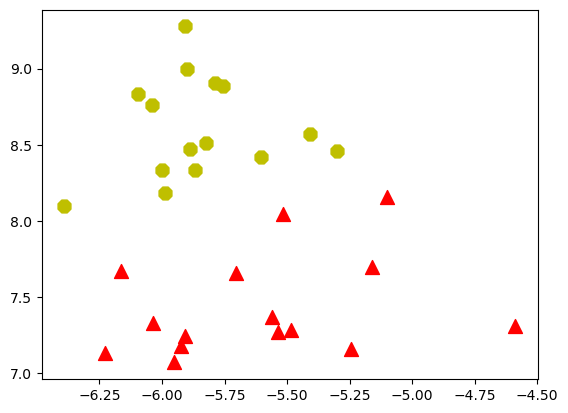

In [3]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="^", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="8", c='y', s=100)
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

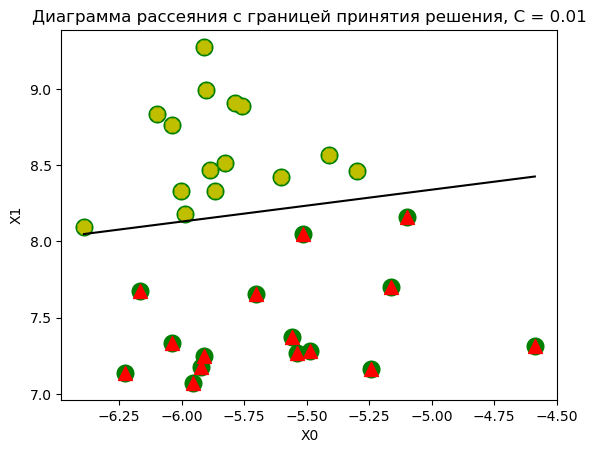

Точность обучения: 1.000


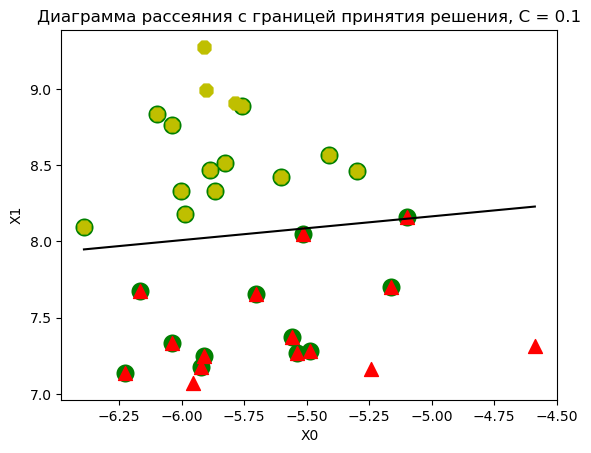

Точность обучения: 0.967


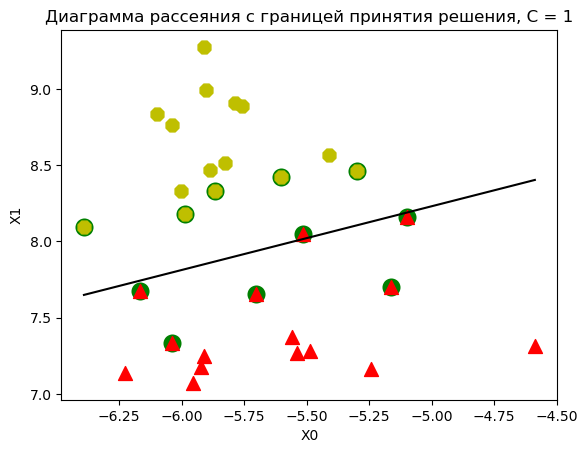

Точность обучения: 0.967


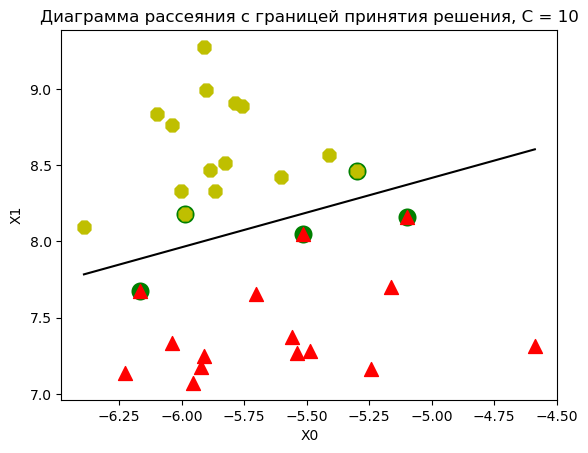

Точность обучения: 1.000


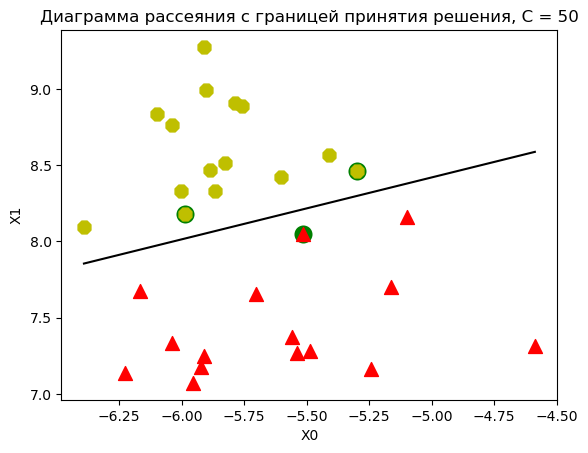

Точность обучения: 1.000


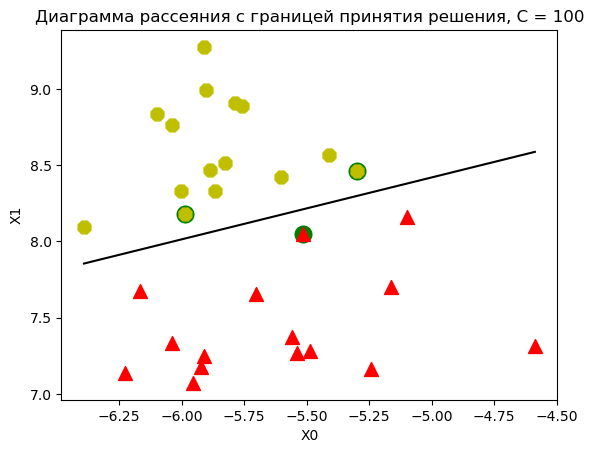

Точность обучения: 1.000


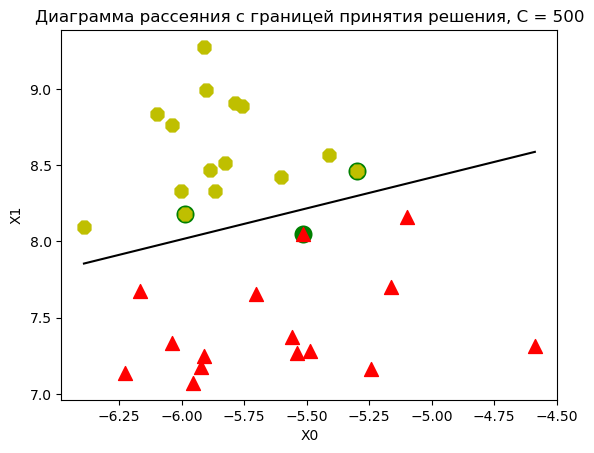

Точность обучения: 1.000


In [7]:
C_list = [0.01, 0.1, 1, 10, 50, 100, 500]
for c in C_list:
    svm_linear = SVC(kernel='linear', C=c)
    svm_linear.fit(X, y)
    y_pred = svm_linear.predict(X)
    
    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    
    plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')
    plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="^", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="8", c='y', s=100)

    plt.title(f"Диаграмма рассеяния c границей принятия решения, C = {c}")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()
    print(f'Точность обучения: {accuracy_score(y, y_pred):.3f}')
    

Вывод: Если "C" увеличивается, то переобучение увеличивается, а если "C" уменьшается, то возрастает недостаточное соответствие объектов к классу.

2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

In [12]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="^", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="8", c='y', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['-.', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [9]:
observation_new_store = [[[-5.75, 7.5]], [[-4.75, 7.5]], [[-4.75, 8.4]], [[-4.75, 8.6]]]

In [10]:
svm_linear_2 = SVC(kernel='linear', C=10)
svm_linear_2.fit(X, y)
    
y_pred = svm_linear.predict(X)

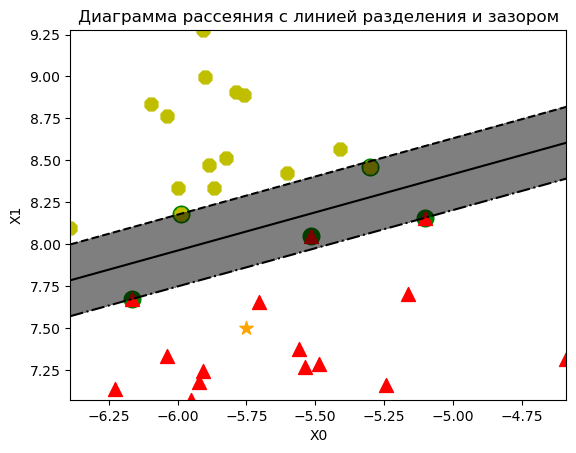

Предсказанное значение нового объекта: [-2.6888747]
Класс нового объекта: [0]
Точность обучения: 1.000


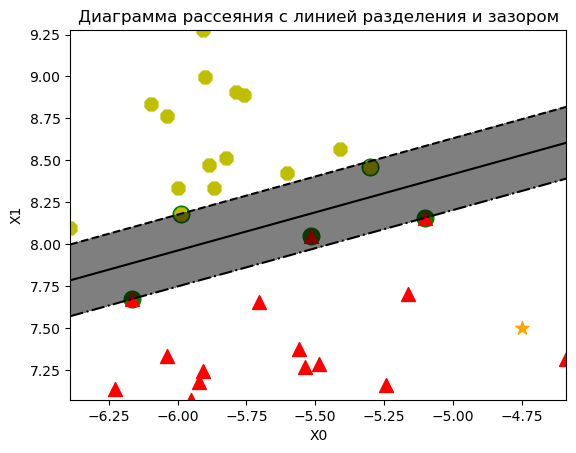

Предсказанное значение нового объекта: [-4.81624817]
Класс нового объекта: [0]
Точность обучения: 1.000


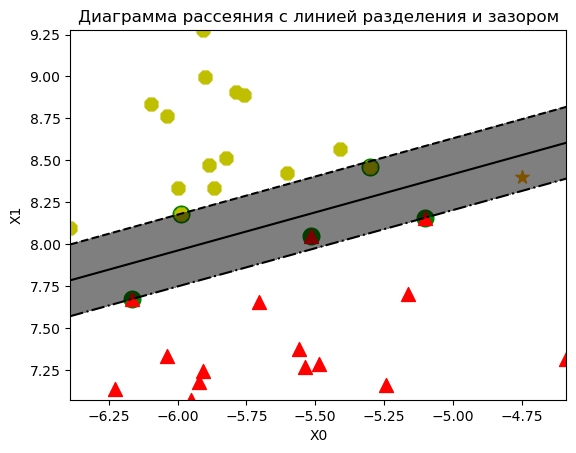

Предсказанное значение нового объекта: [-0.61065315]
Класс нового объекта: [0]
Точность обучения: 1.000


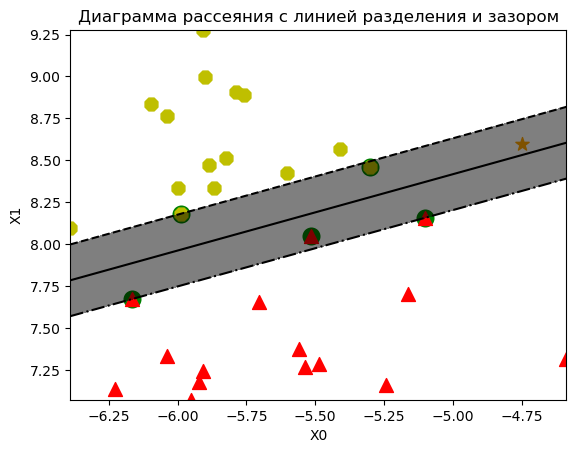

Предсказанное значение нового объекта: [0.32392352]
Класс нового объекта: [1]
Точность обучения: 1.000


In [14]:
for point in observation_new_store:
    plt.scatter(point[0][0], point[0][1], marker='*', s=100, color='orange')
    plot_decision_regions(X, y, svm_linear_2)
    print(f'Предсказанное значение нового объекта: {svm_linear_2.decision_function(point)}')
    print(f'Класс нового объекта: {svm_linear_2.predict(point)}')
    print(f'Точность обучения: {accuracy_score(y, y_pred):.3f}')

3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

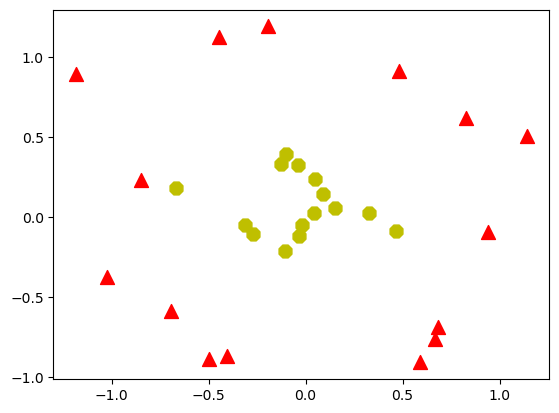

In [112]:
X_circle, y_circle = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X_circle[:, 0][y_circle==0], X_circle[:, 1][y_circle==0], marker="^", c='r', s=100)
plt.scatter(X_circle[:, 0][y_circle==1], X_circle[:, 1][y_circle==1], marker="8", c='y', s=100)
plt.show()

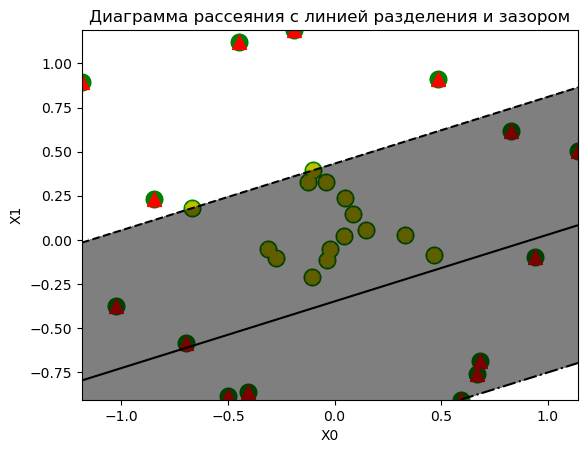

Модель с ядерной функцией: linear
Точность обучения: 0.700


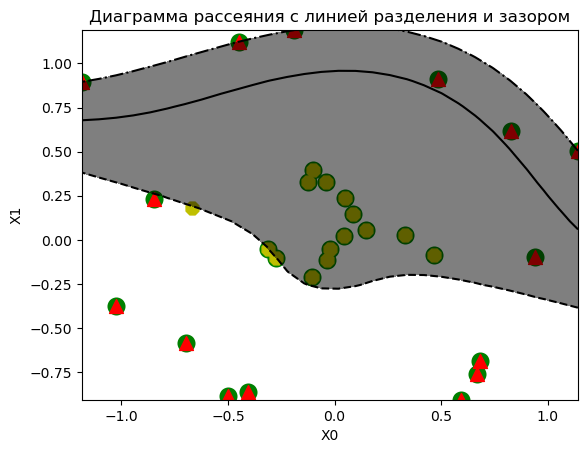

Модель с ядерной функцией: poly
Точность обучения: 0.700


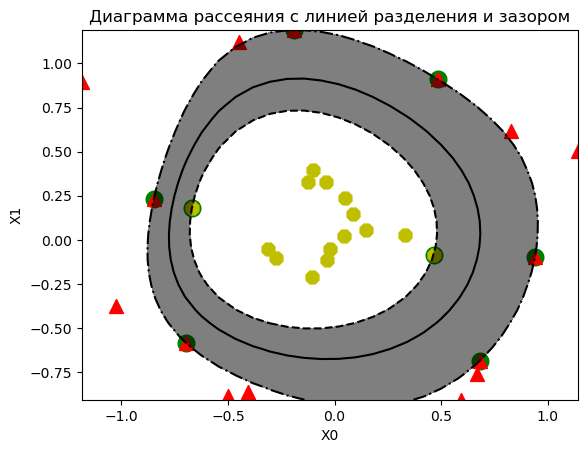

Модель с ядерной функцией: rbf
Точность обучения: 1.000


In [113]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    svm = SVC(kernel=kernel, C=100).fit(X_circle, y_circle)
    y_pred_circle = svm.predict(X_circle)
    plot_decision_regions(X_circle, y_circle, svm)
    print(f'Модель с ядерной функцией: {kernel}')
    print(f'Точность обучения: {accuracy_score(y_circle, y_pred_circle):.3f}')

4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

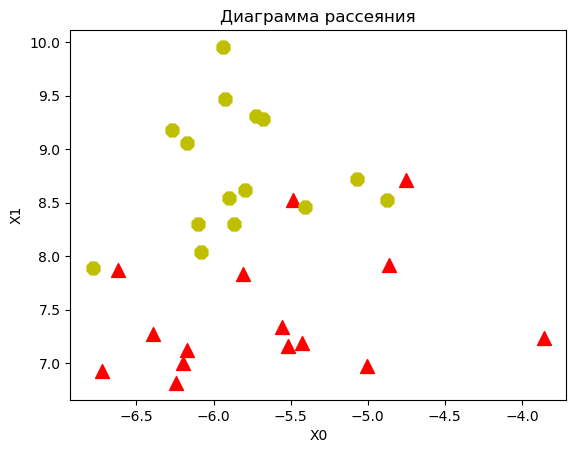

In [97]:
X_wt_gap, y_wt_gap = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X_wt_gap[:, 0][y_wt_gap==0], X_wt_gap[:, 1][y_wt_gap==0], marker="^", c='r', s=100)
plt.scatter(X_wt_gap[:, 0][y_wt_gap==1], X_wt_gap[:, 1][y_wt_gap==1], marker="8", c='y', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

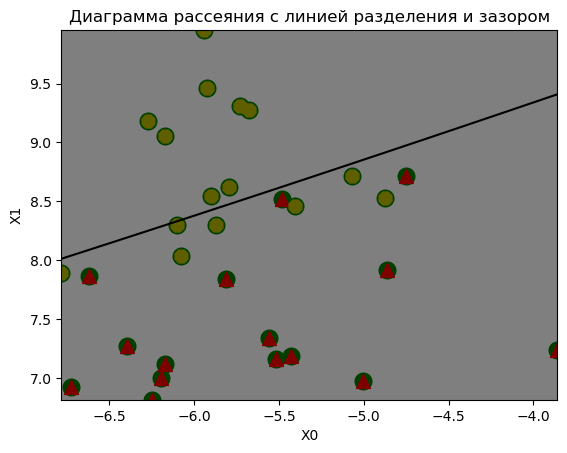

Параметр C = 0.001
Точность обучения: 0.767


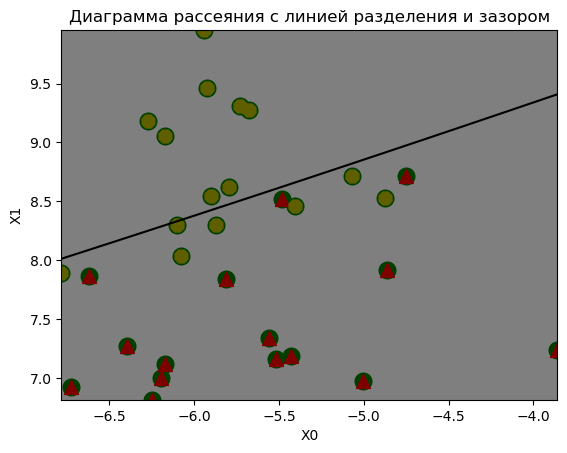

Параметр C = 0.1
Точность обучения: 0.767


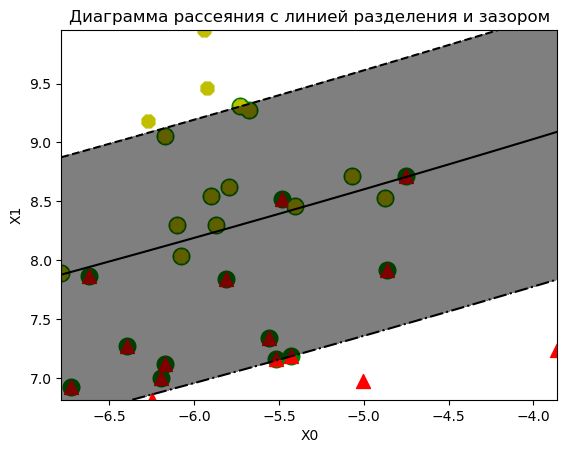

Параметр C = 1
Точность обучения: 0.867


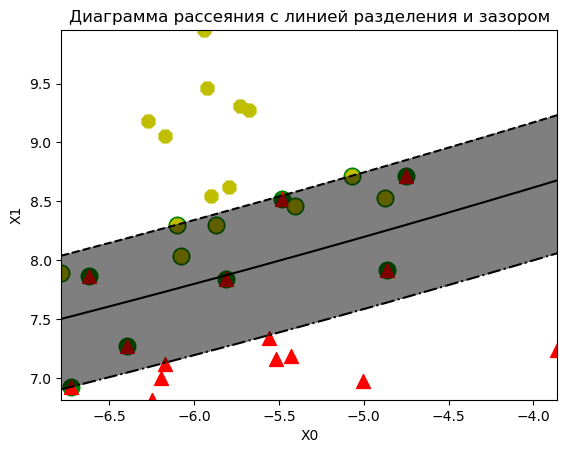

Параметр C = 10
Точность обучения: 0.900


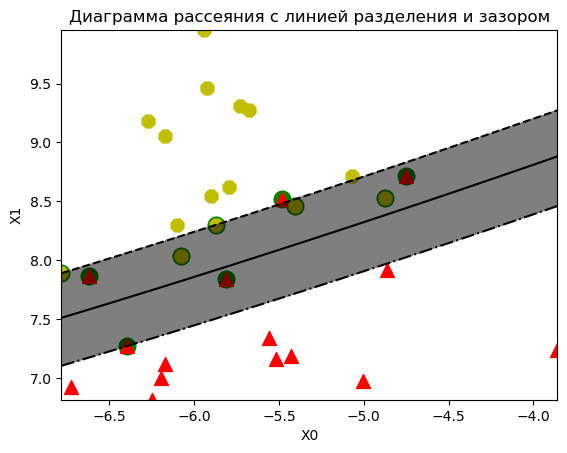

Параметр C = 50
Точность обучения: 0.900


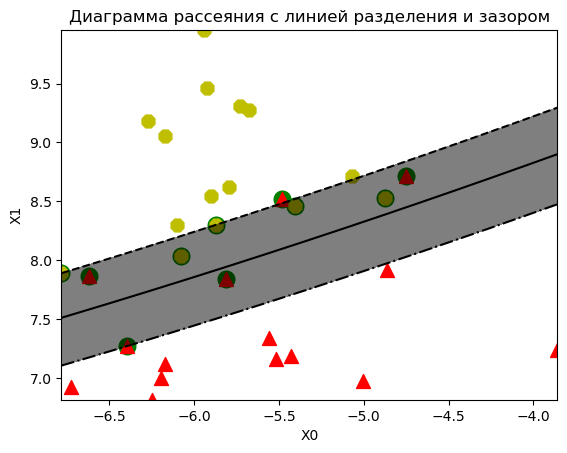

Параметр C = 100
Точность обучения: 0.900


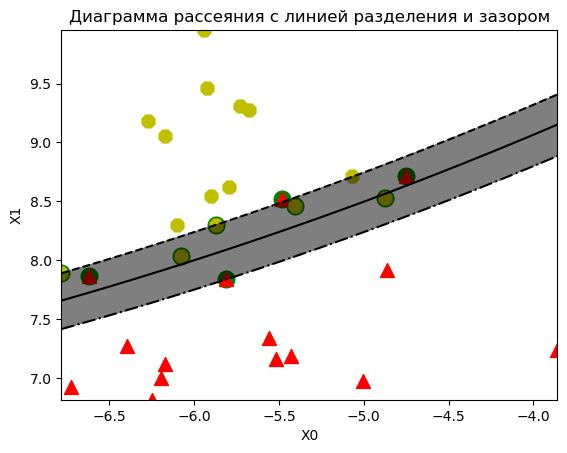

Параметр C = 500
Точность обучения: 0.867


In [114]:
C_list = [0.001, 0.1, 1, 10, 50, 100, 500]
for c in C_list:
    svm_poly = SVC(kernel='poly', C=c).fit(X_wt_gap, y_wt_gap)
    
    y_pred_poly = svm_poly.predict(X_wt_gap)
    
    plot_decision_regions(X_wt_gap, y_wt_gap, svm_poly)
    print(f"Параметр C = {c}")
    print(f'Точность обучения: {accuracy_score(y_wt_gap, y_pred_poly):.3f}')

5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

In [115]:
from sklearn.svm import LinearSVC

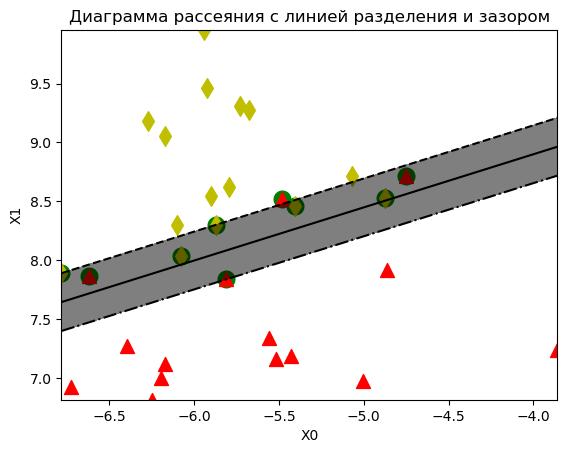

Точность обучения: 0.900
[[12  3]
 [ 0 15]]


In [234]:
svm_5 = SVC(kernel='linear', C=100).fit(X_wt_gap, y_wt_gap)
    
y_pred_5 = svm_5.predict(X_wt_gap)

plot_decision_regions(X_wt_gap, y_wt_gap, svm_5)
print(f'Точность обучения: {accuracy_score(y_wt_gap, y_pred_5):.3f}')
print(confusion_matrix(y_wt_gap, y_pred_lin))

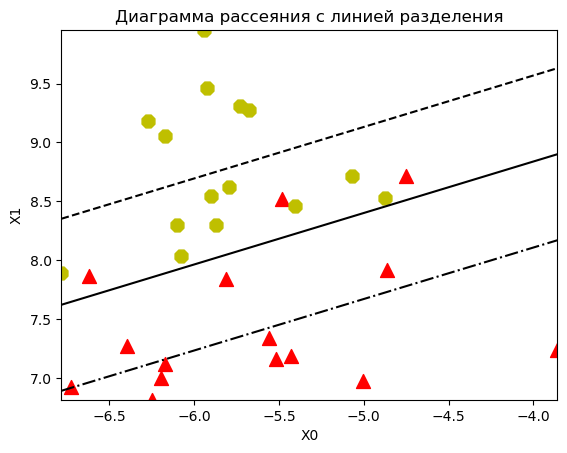

Точность обучения: 0.900
[[12  3]
 [ 0 15]]


In [118]:
lin_svc = LinearSVC(max_iter=200000, C=100).fit(X_wt_gap, y_wt_gap)
    
y_pred_lin = lin_svc.predict(X_wt_gap)

plt.scatter(X_wt_gap[:, 0][y_wt_gap==0], X_wt_gap[:, 1][y_wt_gap==0], marker="^", c='r', s=100)
plt.scatter(X_wt_gap[:, 0][y_wt_gap==1], X_wt_gap[:, 1][y_wt_gap==1], marker="8", c='y', s=100)

X0 = np.linspace(X_wt_gap[:, 0].min(), X_wt_gap[:, 0].max(), X_wt_gap.shape[0])
X1 = np.linspace(X_wt_gap[:, 1].min(), X_wt_gap[:, 1].max(), X_wt_gap.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = lin_svc.intercept_[0] + lin_svc.coef_[0][0] * X0_grid +  lin_svc.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['-.', '-', '--'])

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

print(f'Точность обучения: {accuracy_score(y_wt_gap, y_pred_lin):.3f}')
print(confusion_matrix(y_wt_gap, y_pred_lin))

6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [47]:
import itertools

Модель с ядерной функцией: linear
Параметр C = 0.1
Точность обучения: 0.555


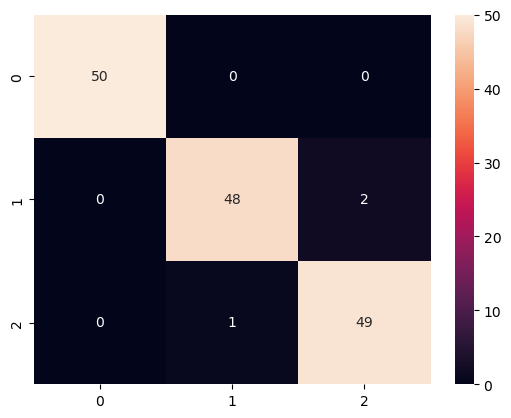

Модель с ядерной функцией: linear
Параметр C = 1
Точность обучения: 0.557


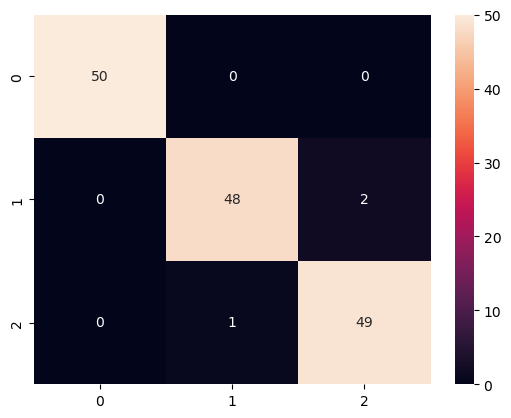

Модель с ядерной функцией: linear
Параметр C = 10
Точность обучения: 0.561


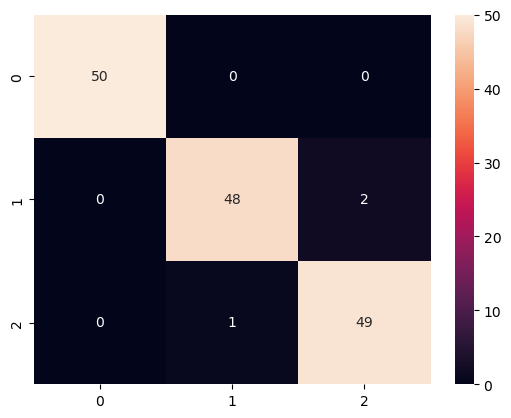

Модель с ядерной функцией: linear
Параметр C = 100
Точность обучения: 0.560


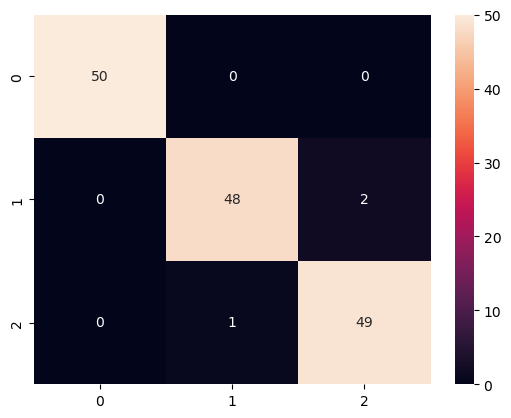

Модель с ядерной функцией: linear
Параметр C = 500
Точность обучения: 0.559


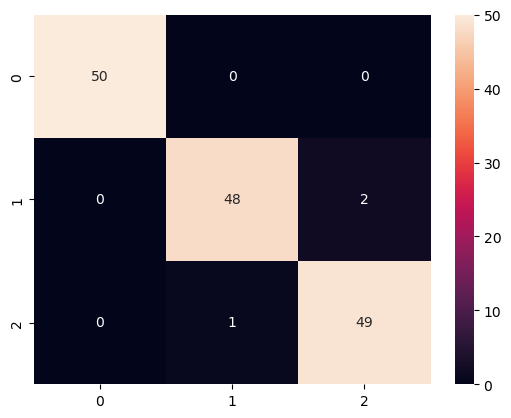

Модель с ядерной функцией: rbf
Параметр C = 0.1
Точность обучения: 0.916


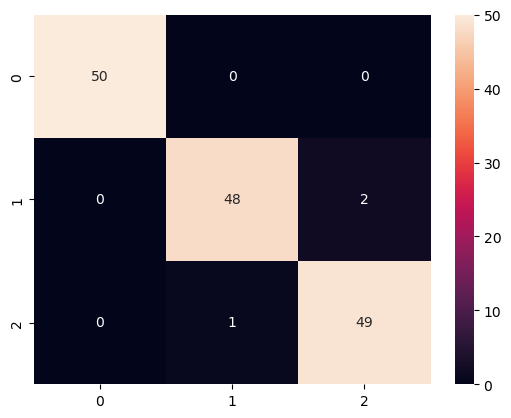

Модель с ядерной функцией: rbf
Параметр C = 1
Точность обучения: 0.933


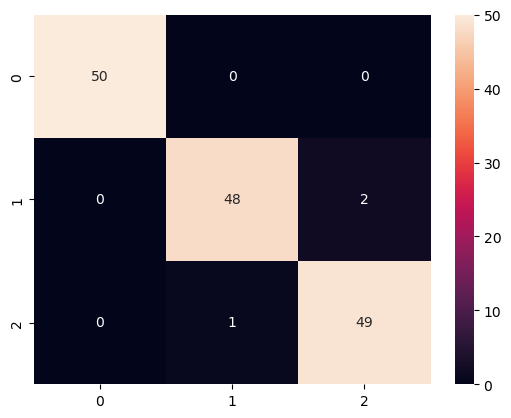

Модель с ядерной функцией: rbf
Параметр C = 10
Точность обучения: 0.965


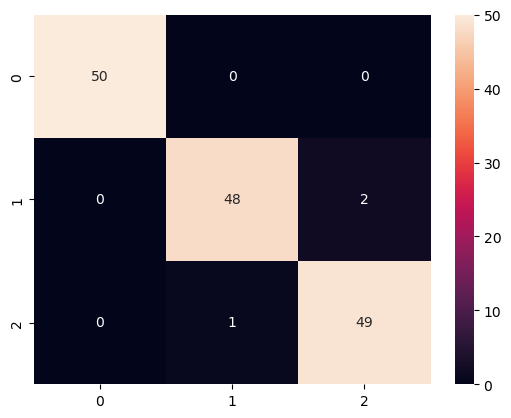

Модель с ядерной функцией: rbf
Параметр C = 100
Точность обучения: 0.981


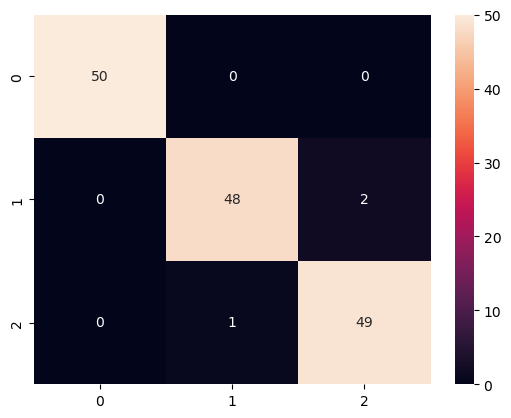

Модель с ядерной функцией: rbf
Параметр C = 500
Точность обучения: 0.989


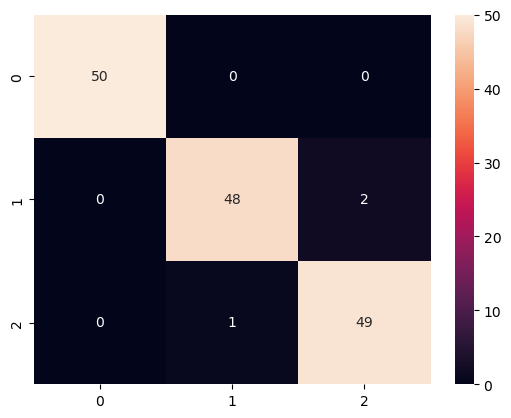

Модель с ядерной функцией: poly
Параметр C = 0.1
Точность обучения: 0.683


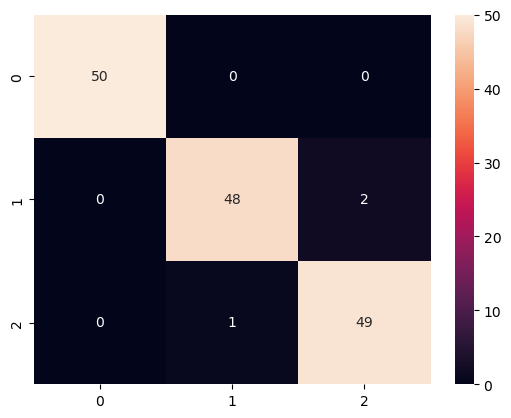

Модель с ядерной функцией: poly
Параметр C = 1
Точность обучения: 0.738


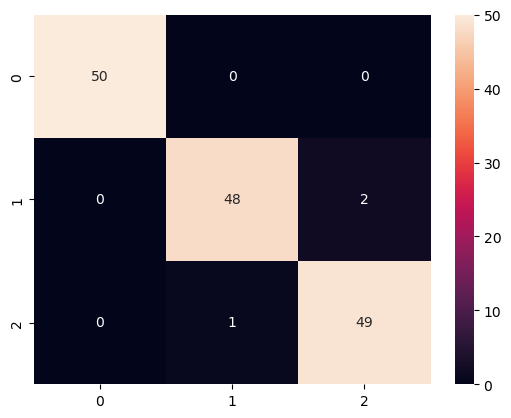

Модель с ядерной функцией: poly
Параметр C = 10
Точность обучения: 0.764


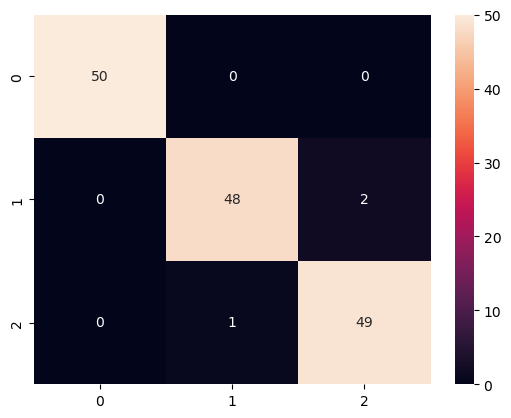

Модель с ядерной функцией: poly
Параметр C = 100
Точность обучения: 0.768


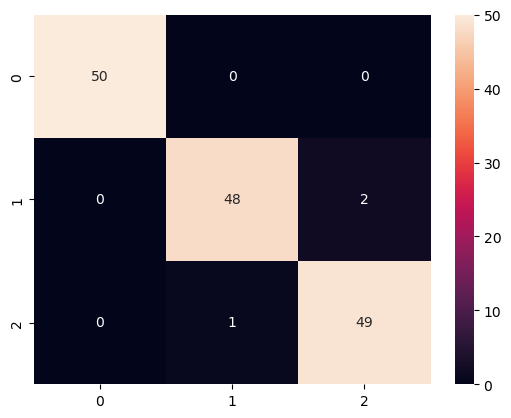

Модель с ядерной функцией: poly
Параметр C = 500
Точность обучения: 0.767


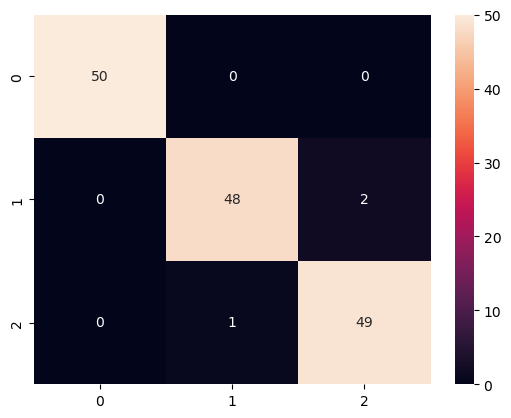

In [122]:
parametrs = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10, 100, 500]}
X_class, y_class = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=0, random_state=4)

for kernel, c in itertools.product(parametrs['kernel'], parametrs['C']):
    svm_class = SVC(kernel=kernel, C=c).fit(X_class, y_class)
    
    y_pred_class = svm_class.predict(X_class)

    print(f'Модель с ядерной функцией: {kernel}')
    print(f"Параметр C = {c}")
    print(f'Точность обучения: {accuracy_score(y_class, y_pred_class):.3f}')
    sns.heatmap(confusion_matrix(y_iris, y_iris_pred), annot=True)
    plt.show()

7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [3]:
import time

In [4]:
points = [1000, 10000, 100000]
for point in points:
    X_class_2, y_class_2 = make_classification(n_samples=point, n_features=5, n_informative=3, n_redundant=0, random_state=4)
    
    start = time.perf_counter()
    svm_class_2 = SVC(kernel='rbf', C=100).fit(X_class_2, y_class_2)
    result_time = time.perf_counter() - start
    
    y_pred_class_2 = svm_class_2.predict(X_class_2)

    print(f'Модель с ядерной функцией: rdf')
    print(f"Параметр C = 100")
    print(f'Точность обучения: {accuracy_score(y_class_2, y_pred_class_2):.3f}')
    print(f'Время обучения: {result_time:.3f}')
    print(confusion_matrix(y_class_2, y_pred_class_2))

Модель с ядерной функцией: rdf
Параметр C = 100
Точность обучения: 0.981
Время обучения: 0.032
[[495   7]
 [ 12 486]]
Модель с ядерной функцией: rdf
Параметр C = 100
Точность обучения: 0.900
Время обучения: 4.477
[[4477  516]
 [ 488 4519]]
Модель с ядерной функцией: rdf
Параметр C = 100
Точность обучения: 0.969
Время обучения: 221.038
[[47381  2600]
 [  546 49473]]


8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

In [133]:
X_8, y_8 = make_blobs(n_features=2, n_samples=100, centers=3, random_state=2, cluster_std=[0.3, 0.4, 0.6])
names_classes = ['синий', 'красный', 'желтый']

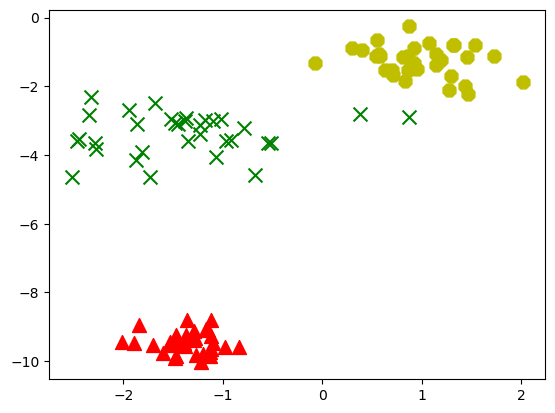

In [13]:
plt.scatter(X_8[:, 0][y_8==0], X_8[:, 1][y_8==0], marker="^", c='r', s=100)
plt.scatter(X_8[:, 0][y_8==1], X_8[:, 1][y_8==1], marker="8", c='y', s=100)
plt.scatter(X_8[:, 0][y_8==2], X_8[:, 1][y_8==2], marker="x", c='g', s=100)

Точность обучения: 1.000
[[34  0  0]
 [ 0 33  0]
 [ 0  0 33]]


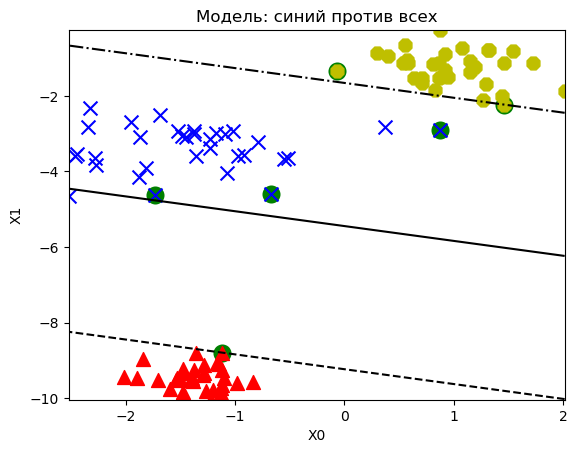

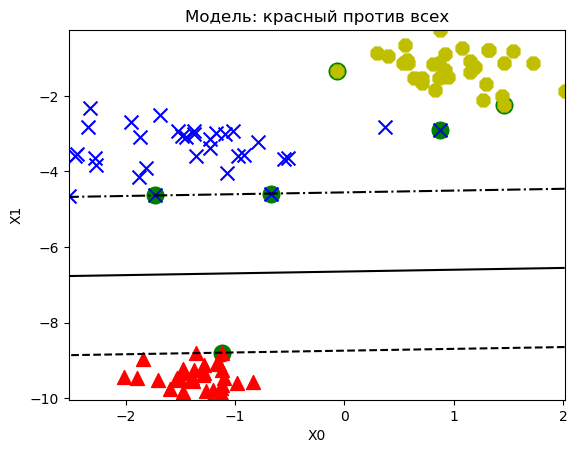

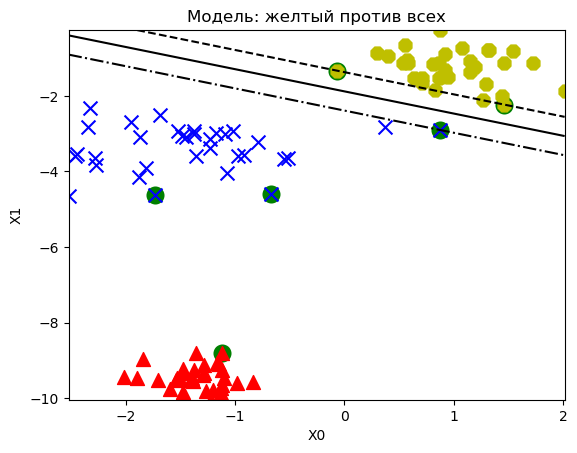

In [134]:
svm_multy_class = SVC(kernel='linear', C=100, decision_function_shape='ovr').fit(X_8, y_8)
y_8_pred = svm_multy_class.predict(X_8)
print(f'Точность обучения: {accuracy_score(y_8, y_8_pred):.3f}')
print(confusion_matrix(y_8, y_8_pred))

X0 = np.linspace(X_8[:, 0].min(),X_8[:, 0].max(), X_8.shape[0])
X1 = np.linspace(X_8[:, 1].min(),X_8[:, 1].max(), X_8.shape[0])

for index in range(svm_multy_class.classes_.shape[0]):
    plt.scatter(svm_multy_class.support_vectors_[:, 0],svm_multy_class.support_vectors_[:, 1], linewidth=7, facecolors='green')
    
    plt.scatter(X_8[:, 0][y_8==0], X_8[:, 1][y_8==0], marker="^", c='r', s=100)
    plt.scatter(X_8[:, 0][y_8==1], X_8[:, 1][y_8==1], marker="8", c='y', s=100)
    plt.scatter(X_8[:, 0][y_8==2], X_8[:, 1][y_8==2], marker="x", c='blue', s=100)
    
    X0_grid, X1_grid = np.meshgrid(X0, X1)  
    Z = svm_multy_class.intercept_[index] + svm_multy_class.coef_[index][0] * X0_grid +  svm_multy_class.coef_[index][1] * X1_grid
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['-.', '-', '--'])
    #plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)
    
    
    plt.title(f'Модель: {names_classes[index]} против всех')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()
    




9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [87]:
from sklearn import datasets

In [78]:
X_iris, y_iris = datasets.load_iris(return_X_y=True)

In [81]:
X_iris.shape, y_iris.shape

((150, 4), (150,))

In [83]:
print(f'Количество классов: {len(set(y_iris))}')

Количество классов: 3


Точность обучения: 0.980


<AxesSubplot:>

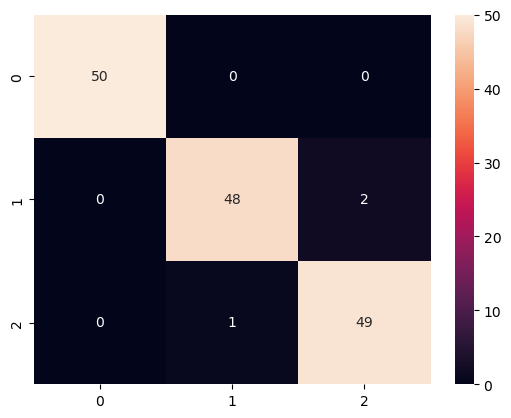

In [94]:
svc_iris = SVC(kernel='linear', C=100).fit(X_iris, y_iris)

y_iris_pred = svc_iris.predict(X_iris)
print(f'Точность обучения: {accuracy_score(y_iris, y_iris_pred):.3f}')
sns.heatmap(confusion_matrix(y_iris, y_iris_pred), annot=True)

10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

In [138]:
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

In [137]:
X_diabetes.shape, y_diabetes.shape

((442, 10), (442,))

In [140]:
svm_regressor = SVR(kernel='linear', C=100)
svm_regressor.fit(X, y)

y_pred = svm_regressor.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Среднеквадратичная ошибка (MSE): 0.05
Коэффициент детерминации (R^2): 0.79
